In [8]:
# Logistic regression
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn import metrics
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# loading the file into a dataframe
df = pd.read_csv('df_with_dummies_poly_stadatdised.csv', index_col=0)
df.head()

,age,edu_years,hours_per_week,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US,age^2,age edu_years,age hours_per_week,age sex_code,edu_years^2,edu_years hours_per_week,edu_years sex_code,hours_per_week^2,hours_per_week sex_code
0,0.063387,1.149612,-0.056672,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.095037,0.696633,-0.012412,-0.636648,1.190292,0.630555,-0.670598,-0.188466,-0.656235
1,0.922644,1.149612,-2.577111,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.823901,1.550439,-1.351776,-0.636648,1.190292,-1.528051,-0.670598,-1.836042,-0.656235
2,-0.014727,-0.477013,-0.056672,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.167314,-0.288528,-0.071285,-0.636648,-0.571243,-0.353425,-0.670598,-0.188466,-0.656235
3,1.156987,-1.290325,-0.056672,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.113943,-0.115378,0.811813,-0.636648,-1.211801,-0.845415,-0.670598,-0.188466,-0.656235
4,-0.795871,1.149612,-0.056672,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,-0.786822,-0.157173,-0.660017,0.856902,1.190292,0.630555,1.966516,-0.188466,1.525701


In [4]:
y = df.income_code
X = df.drop(columns=['income_code'])

In [5]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#predict the training set
y_pred_train_log = logreg.predict(X_train)

#
y_pred_test=logreg.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train_log))
print("Testing F1 Score:",f1_score(y_test, y_pred_test))

Training F1 Score: 0.6353674474715995
Testing F1 Score: 0.630514705882353


In [11]:
# import the metrics class

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[5093,  434],
       [ 772, 1029]])

Text(0.5, 257.44, 'Predicted label')

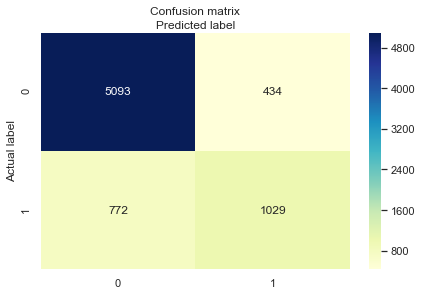

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("LogReg Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("LogReg Precision:",metrics.precision_score(y_test, y_pred_test))
print("LogReg Recall:",metrics.recall_score(y_test, y_pred_test))


LogReg Accuracy: 0.8354257641921398
LogReg Precision: 0.7033492822966507
LogReg Recall: 0.5713492504164354


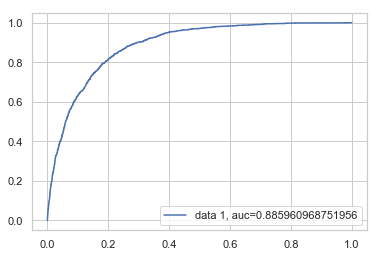

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [16]:
# baseline decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# training accuracy
y_pred_train_dt = clf.predict(X_train)

#Predict the response for test dataset
y_pred_tree_dt = clf.predict(X_test)

In [18]:
# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train_dt))
print("Testing F1 Score:",f1_score(y_test, y_pred_tree_dt))

Training F1 Score: 0.9318718699801568
Testing F1 Score: 0.5452488687782805


In [19]:
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred_tree_dt))

Decision Tree Accuracy: 0.7805676855895196


In [20]:
# CV for decision tree
# Import Grid search
from sklearn.model_selection import GridSearchCV
parameters={ 'max_depth': range(2,20,1)}
#create the instance of GridSearchCV
grid_tree=GridSearchCV(clf,parameters,  cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [21]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.6319813046743566
{'max_depth': 8}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [22]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.f1_score(y_test, y_pred))
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6225319396051103
Decision Tree Accuracy: 0.8225982532751092


In [23]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [24]:
# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid= parameters,
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


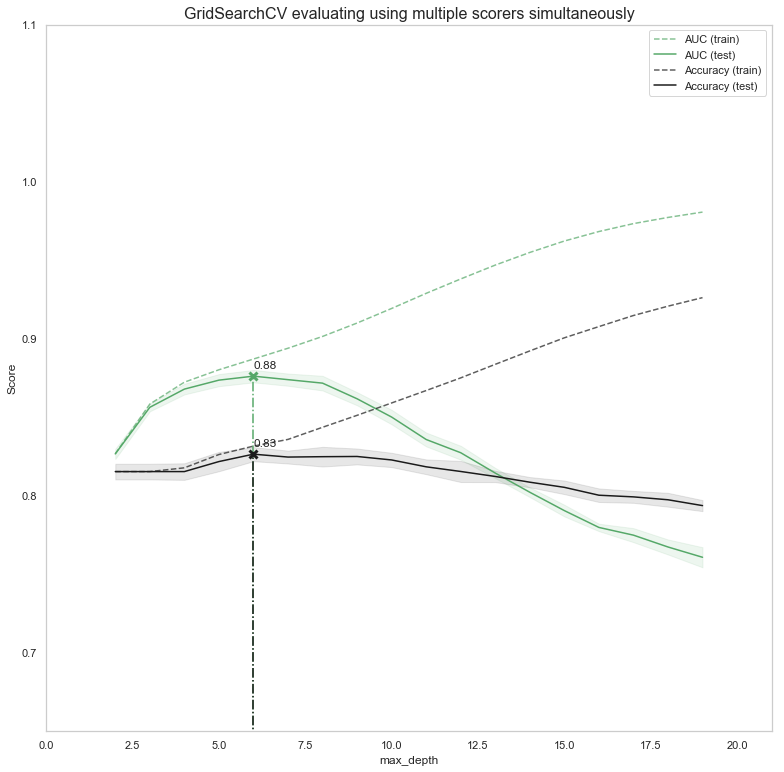

In [25]:
import numpy as np
from matplotlib import pyplot as plt



plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("max_depth")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 21)
ax.set_ylim(0.65, 1.1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [17]:
# baseline forrest

In [27]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfclf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfclf.fit(X_train,y_train)

#predict the training set
y_pred_train_forrest = rfclf.predict(X_train)

y_pred_forrest=rfclf.predict(X_test)

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Random Forrest Accuracy:",metrics.accuracy_score(y_test, y_pred_forrest))

Random Forrest Accuracy: 0.8165938864628821


In [29]:
# baseline XGBoost

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [31]:
feature_cols = X.columns

In [32]:
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)

In [33]:
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [34]:
XGpreds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, XGpreds)
test_acc = accuracy_score(y_test, XGpreds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.830513
F1: 0.612117


In [35]:
data_dmatrix = xgb.DMatrix(data=X,label=y)


/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [41]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=300,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results.head() 

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.659346,0.000332,0.659424,0.000724
1,0.625650,0.004259,0.625711,0.005642
2,0.597024,0.004940,0.597195,0.006922
3,0.572229,0.004801,0.572303,0.007208
4,0.552591,0.006815,0.552705,0.009927


In [42]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

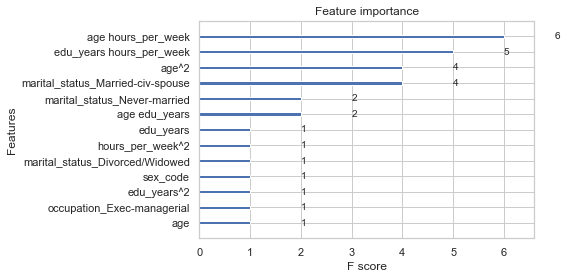

In [44]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [40]:
XGpreds_best = xg_clf.predict(X_test)

test_f1 = f1_score(y_test, XGpreds_best)
test_acc = accuracy_score(y_test, XGpreds_best)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [45]:
# KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
# make class predictions for the testing set
y_pred_class_knn = knn.predict(X_test)

In [52]:
# calculate accuracy

print('KNN Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class_knn)))
print('KNN F1: ' + str(metrics.f1_score(y_test, y_pred_class_knn)))

KNN Accuracy:0.8115447598253275
KNN F1: 0.6012128212532487


Confusion Matrix, without normalization
[[4906  621]
 [ 760 1041]]


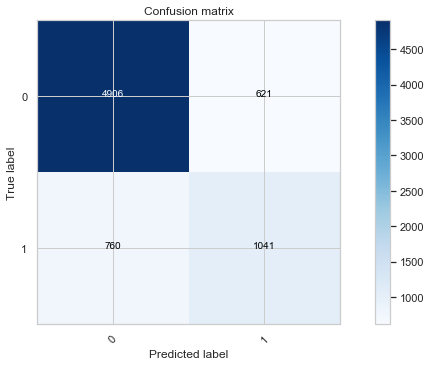

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class_knn)
classes = ['0', '1']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [55]:
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.7781868024389768, 0.7751595271070012, 0.8011827917450466, 0.7971388016594286, 0.8089327577292389, 0.8073849370380518, 0.8132427771924087, 0.8045189585714616, 0.8123701534682173, 0.807324585205938, 0.8140614229246714, 0.809223935879141, 0.8141343008079028, 0.8123814381129926, 0.814774783093199, 0.8123782426471857, 0.8133185463837739, 0.8099649648093877, 0.8154425218297398, 0.8131962752971594, 0.8151697397644522, 0.813302080298882, 0.8137896573567371, 0.8145301079140126]


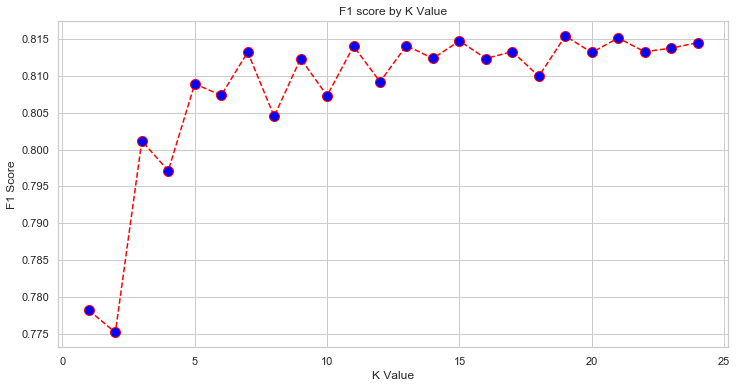

In [56]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()